In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\train.csv")

In [3]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [4]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [6]:
df.shape

(10000, 12)

In [7]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [8]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [9]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [10]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [11]:
df['Severity'].value_counts(normalize=True)

Highly_Fatal_And_Damaging                  0.3049
Significant_Damage_And_Serious_Injuries    0.2729
Minor_Damage_And_Injuries                  0.2527
Significant_Damage_And_Fatalities          0.1695
Name: Severity, dtype: float64

In [12]:
df.nunique()


Severity                       4
Safety_Score                1175
Days_Since_Inspection         23
Total_Safety_Complaints       44
Control_Metric               952
Turbulence_In_gforces       1117
Cabin_Temperature            950
Accident_Type_Code             7
Max_Elevation               4191
Violations                     6
Adverse_Weather_Metric      4258
Accident_ID                10000
dtype: int64

In [13]:
df['Accident_Type_Code'].value_counts()

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

In [14]:
#for 
#    print(df.groupby('class').size())

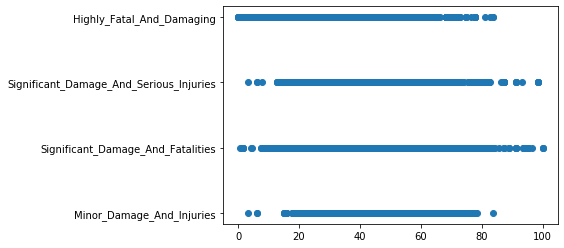

In [15]:
plt.scatter(df['Safety_Score'],df['Severity'])

In [16]:
#df.hist(figsize=(25,20))

Safety_Score                 AxesSubplot(0.125,0.821923;0.0596154x0.0580769)
Days_Since_Inspection      AxesSubplot(0.196538,0.821923;0.0596154x0.0580...
Total_Safety_Complaints    AxesSubplot(0.268077,0.821923;0.0596154x0.0580...
Control_Metric             AxesSubplot(0.339615,0.821923;0.0596154x0.0580...
Turbulence_In_gforces      AxesSubplot(0.411154,0.821923;0.0596154x0.0580...
Cabin_Temperature          AxesSubplot(0.482692,0.821923;0.0596154x0.0580...
Accident_Type_Code         AxesSubplot(0.554231,0.821923;0.0596154x0.0580...
Max_Elevation              AxesSubplot(0.625769,0.821923;0.0596154x0.0580...
Violations                 AxesSubplot(0.697308,0.821923;0.0596154x0.0580...
Adverse_Weather_Metric     AxesSubplot(0.768846,0.821923;0.0596154x0.0580...
Accident_ID                AxesSubplot(0.840385,0.821923;0.0596154x0.0580...
dtype: object

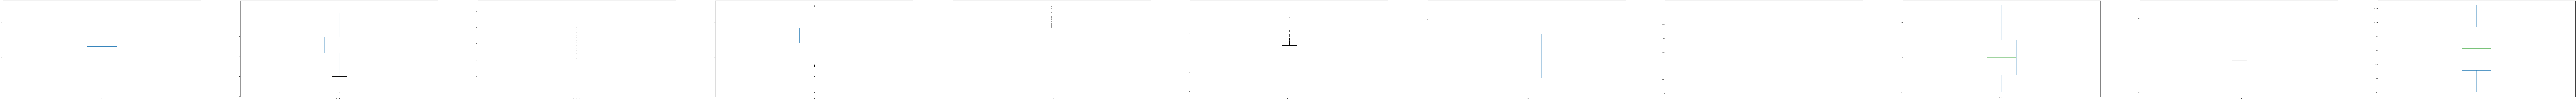

In [17]:
df.plot(kind='box', subplots=True, layout=(11,11), sharex=False, sharey=False, figsize=(512,256))

In [18]:
from pandas.plotting import scatter_matrix

In [19]:
#scatter_matrix(df,figsize=(50,40))

In [20]:
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le_Severity=LabelEncoder()
le_Severity.fit(df['Severity'])
df['Severity']=le_Severity.transform(df['Severity'])

In [23]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [25]:
df_1=df.set_index('Accident_ID')

In [26]:
df_1.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [27]:
y=df_1['Severity']


In [28]:
y.head()

Accident_ID
7570     1
12128    1
2181     2
5946     3
9054     2
Name: Severity, dtype: int32

In [29]:
ind=np.arange(1,11).tolist()

In [30]:
X=df_1.iloc[:,ind]

In [31]:
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [35]:
warnings.filterwarnings("ignore",category=FutureWarning)

In [36]:
kfold=StratifiedKFold(n_splits=10,random_state=12,shuffle=True)

In [37]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
lr.coef_

array([[-1.31754026e-01, -4.14743130e-01, -5.20043810e-03,
         2.31564878e-02, -9.34076060e-04,  1.02530810e-01,
        -6.48309679e-02,  6.30326677e-06, -1.56787656e-02,
         1.18637961e-02],
       [ 5.69728713e-02,  1.48472787e-01,  2.66032309e-04,
        -1.24625947e-02, -9.66138983e-04, -5.31833663e-02,
        -1.24568424e-01,  1.77385039e-06, -1.00593374e-02,
         1.07561778e-02],
       [ 4.11784905e-02,  1.29141640e-01, -3.56160906e-03,
        -4.27190279e-02, -1.26786036e-03, -2.98824337e-02,
         1.02830119e-01, -1.32441138e-05,  3.21903003e-02,
         6.90723895e-03],
       [ 3.05526930e-03, -1.28279789e-02,  5.90929458e-03,
         2.71237829e-02, -1.52161178e-04, -3.78244618e-02,
         2.35955249e-02,  4.48958564e-06, -2.55592995e-03,
        -5.76954464e-03]])

In [39]:
X.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [40]:
lr_predict=lr.predict(X_test)

In [41]:
f1_score(y_test,lr_predict,average='weighted')

0.5003574263087301

In [42]:
svc=SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
svc_predict=svc.predict(X_test)

In [44]:
f1_score(y_test,svc_predict,average='weighted')

0.22360086968529308

In [45]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
xgb_predict=xgb.predict(X_test)

In [47]:
f1_score(y_test,xgb_predict,average='weighted')

0.833163402235447

In [48]:
def score(actual,predicted):
    return f1_score(actual,predicted,average='weighted')

In [49]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('xgboost',XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print(f'name:{name}   result_mean={cv_results.mean()}')
    print('{0}     {1:.2f}'.format(name,cv_results.mean()))

LR     0.54
KNN     0.41


In [50]:
def classification_model_evaluation(models,X_train,y_train,pcv=10,score='accuracy'):
    result={}
    for name,model in models:
        cv_result=cross_val_score(model,X_train,y_train,cv=pcv,scoring=score)
        result[name]=cv_result
        print('{0}     {1:.2f}'.format(name,cv_result.mean()))

In [51]:
classification_model_evaluation(models,X_train, y_train)

LR     0.55
KNN     0.41


In [52]:
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))]


In [53]:
name_lr,model_lr=models[0]

In [54]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
model_lr.coef_

array([[-1.31754026e-01, -4.14743130e-01, -5.20043810e-03,
         2.31564878e-02, -9.34076060e-04,  1.02530810e-01,
        -6.48309679e-02,  6.30326677e-06, -1.56787656e-02,
         1.18637961e-02],
       [ 5.69728713e-02,  1.48472787e-01,  2.66032309e-04,
        -1.24625947e-02, -9.66138983e-04, -5.31833663e-02,
        -1.24568424e-01,  1.77385039e-06, -1.00593374e-02,
         1.07561778e-02],
       [ 4.11784905e-02,  1.29141640e-01, -3.56160906e-03,
        -4.27190279e-02, -1.26786036e-03, -2.98824337e-02,
         1.02830119e-01, -1.32441138e-05,  3.21903003e-02,
         6.90723895e-03],
       [ 3.05526930e-03, -1.28279789e-02,  5.90929458e-03,
         2.71237829e-02, -1.52161178e-04, -3.78244618e-02,
         2.35955249e-02,  4.48958564e-06, -2.55592995e-03,
        -5.76954464e-03]])

In [56]:
lr_prob_result=model_lr.predict_proba(X_test)

In [57]:
model.fit(X_train,y_train)
xgb_cv_predict= model.predict(X_test)

In [58]:
from xgboost import plot_importance

In [59]:
#plot_importance(model)

In [60]:
xgb_cv_score=f1_score(y_test,xgb_cv_predict,average='weighted')

In [61]:
print(xgb_cv_score)

0.4221491697815374


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [64]:
parametres={}

In [65]:
df_result=pd.DataFrame({"original":y_test,"predicted":xgb_cv_predict})

In [66]:
df_result.count()

original     3000
predicted    3000
dtype: int64

In [67]:
df_pr=df_result.where(df_result['original']!=df_result['predicted'])

In [68]:
y_test

Accident_ID
12306    0
5704     3
9628     3
1572     3
11642    3
        ..
7909     0
8099     1
1579     3
6687     0
10431    1
Name: Severity, Length: 3000, dtype: int32

In [69]:
xgb_cv_predict

array([0, 1, 3, ..., 1, 0, 1])

In [70]:
pd.set_option('display.max_rows', 600)

In [71]:
pd.options.display.max_rows

600

In [72]:
df_pr.dropna(inplace=True)

In [73]:
xgb_prob=XGBClassifier()

In [74]:
xgb_prob.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
xgb_prob_result=xgb_prob.predict_proba(X_test)

In [76]:
xgb_prob_result

array([[0.6621654 , 0.08528586, 0.03240757, 0.22014116],
       [0.16133288, 0.14223282, 0.04688734, 0.649547  ],
       [0.05037215, 0.24782358, 0.04749373, 0.6543105 ],
       ...,
       [0.12884256, 0.05550042, 0.02364994, 0.7920071 ],
       [0.80809236, 0.00184152, 0.00740498, 0.18266118],
       [0.21849562, 0.24569851, 0.19950682, 0.33629903]], dtype=float32)

In [77]:
pd.set_option('display.max_rows', 32000)

In [78]:
pd.options.display.max_rows

32000

In [79]:
#pd_df=pd.DataFrame(prob)

In [80]:
#print(pd_df)

In [81]:
df_result.reset_index()

,Accident_ID,original,predicted
0,12306,0,0
1,5704,3,1
2,9628,3,3
3,1572,3,1
4,11642,3,3
5,6992,1,0
6,10803,0,2
7,10726,1,0
8,9277,0,3
9,6951,1,1


In [82]:
lr_prob=lr.predict_proba(X_test)

In [83]:
lr_prob_df=pd.DataFrame(lr_prob)
lr_prob_df

,0,1,2,3
0,0.521488,0.117055,0.071560,0.289896
1,0.246893,0.226114,0.243282,0.283712
2,0.066353,0.312197,0.372028,0.249423
3,0.438656,0.172082,0.147558,0.241705
4,0.294605,0.195301,0.176745,0.333349
5,0.055433,0.413211,0.146244,0.385111
6,0.088435,0.443476,0.272006,0.196083
7,0.237331,0.317747,0.065372,0.379550
8,0.474987,0.129921,0.139507,0.255584
9,0.053119,0.444732,0.152821,0.349328


In [84]:
columns=df.columns

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.411579 (0.020915)


In [85]:
columns=df.columns

In [86]:
columns=[]
model_fs=XGBClassifier()
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for i in X_train.columns:
    columns.append(i)
    X_Sel=X_train.loc[:,columns]
    cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
    #print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
    print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))


 0.454154 (0.018407)
 0.757710 (0.011973)
 0.758140 (0.011500)
 0.881574 (0.010603)
 0.879140 (0.012110)
 0.878716 (0.013320)
 0.832855 (0.015970)
 0.825714 (0.014153)
 0.823998 (0.013730)
 0.826288 (0.014090)


In [87]:
print(columns)

['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']


In [88]:
new_col=['Safety_Score','Days_Since_Inspection','Control_Metric']
 
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

X_Sel=X_train.loc[:,new_col]
cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
#print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))



 0.878282 (0.012205)


In [89]:
model_fs.fit(X_Sel,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
X_test_new=X_test.loc[:,new_col]
New_predict=model_fs.predict(X_test_new)

In [91]:
f1_score(y_test,New_predict,average='weighted')

0.8833722142020539

In [92]:
col=['Safety_Score','Days_Since_Inspection','Control_Metric']
X_feature_sel=X_train.loc[:,col]

In [93]:
print(X_feature_sel)

             Safety_Score  Days_Since_Inspection  Control_Metric
Accident_ID                                                     
12416           40.639269                      9       54.056518
6476            68.264840                      8       79.033728
11830           21.278539                     15       61.531449
10634           34.840183                     14       57.702826
3857            67.305936                      8       70.373747
382             43.652968                     12       59.662716
9952            28.219178                     20       71.011851
4320            36.118721                     11       75.159526
11052           39.726027                     17       59.298086
5524            52.465753                      9       58.933455
8938            48.675799                      7       67.639015
1645            64.155251                      9       86.235187
8987            71.689498                      4       55.606199
10357           36.575342

In [94]:
x=20
y=40
print('X={0} {1}'.format(x,y))

X=20 40


In [95]:
df_test=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\test.csv")

In [96]:
df_test_sel=df_test.loc[:,new_col]
df_accid=df_test['Accident_ID']

In [97]:
df_test_sel.head()

,Safety_Score,Days_Since_Inspection,Control_Metric
0,19.497717,16,72.151322
1,58.173516,15,64.585232
2,33.287671,15,64.721969
3,3.287671,21,66.362808
4,10.867580,18,56.107566


In [98]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [99]:
test_predict=model_fs.predict(df_test_sel)

In [100]:
result=pd.DataFrame({'Accident':df_accid,'Severity':test_predict})

In [101]:
result['Severity']=result['Severity'].replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [102]:
print(result)

      Accident                                 Severity
0            1                Highly_Fatal_And_Damaging
1           10        Significant_Damage_And_Fatalities
2           14  Significant_Damage_And_Serious_Injuries
3           17                Highly_Fatal_And_Damaging
4           21        Significant_Damage_And_Fatalities
5           40        Significant_Damage_And_Fatalities
6           45        Significant_Damage_And_Fatalities
7           50                Highly_Fatal_And_Damaging
8           52                Highly_Fatal_And_Damaging
9           85  Significant_Damage_And_Serious_Injuries
10          95  Significant_Damage_And_Serious_Injuries
11         106  Significant_Damage_And_Serious_Injuries
12         111                Highly_Fatal_And_Damaging
13         123                Highly_Fatal_And_Damaging
14         129        Significant_Damage_And_Fatalities
15         130  Significant_Damage_And_Serious_Injuries
16         132                Highly_Fatal_And_D

In [103]:
le_Severity.classes_

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [104]:
test_predict_df=pd.DataFrame(test_predict)
result_final__1=test_predict_df.replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [105]:
#result=pd.DataFrame({'Accident':df_accid,'Severity':result_final__1})

In [106]:
result.to_csv("airplane_accident_prediction1.csv")

In [107]:
#result_final.head()

In [108]:
final_prob=xgb_prob_result+lr_prob_result

In [109]:
print(final_prob)

[[1.18365372 0.20234091 0.10396792 0.51003744]
 [0.40822546 0.36834638 0.29016917 0.93325901]
 [0.11672473 0.56002051 0.41952123 0.9037335 ]
 ...
 [0.34700603 0.3666047  0.22137189 1.06501739]
 [1.46742947 0.08640384 0.06828012 0.37788661]
 [0.45068038 0.45715383 0.57595926 0.51620651]]


In [110]:
final_prob=final_prob/2

In [111]:
print(final_prob)

[[0.59182686 0.10117045 0.05198396 0.25501872]
 [0.20411273 0.18417319 0.14508459 0.4666295 ]
 [0.05836237 0.28001026 0.20976062 0.45186675]
 ...
 [0.17350302 0.18330235 0.11068595 0.53250869]
 [0.73371473 0.04320192 0.03414006 0.18894331]
 [0.22534019 0.22857692 0.28797963 0.25810325]]


In [112]:
type(final_prob)

numpy.ndarray

In [113]:
np.amax(final_prob,axis=1)

array([0.59182686, 0.4666295 , 0.45186675, ..., 0.53250869, 0.73371473,
       0.28797963])

In [114]:
#final_prob_df=pd.DataFrame(final_prob)

In [115]:
index=np.where(final_prob==np.amax(final_prob))

In [116]:
final_predic=final_prob.argmax(axis=1)

In [117]:
fi_ens=f1_score(y_test,final_predic,average='weighted')

In [118]:
fi_ens

0.8001608619578737

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc=RandomForestClassifier(max_features=2,n_estimators=2)

In [121]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=2, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=807110376, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=2, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1238256712, splitter='best')]

In [124]:
X_Sel.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [125]:
#x_train.colu
rfc.feature_importances_

array([0.23926871, 0.13183371, 0.0454488 , 0.12697779, 0.07396735,
       0.06338205, 0.08984015, 0.05890403, 0.02573515, 0.14464224])

In [126]:
col=X_train.columns

In [127]:
for i in range(df.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [128]:
rfc.feature_importances_

array([0.23926871, 0.13183371, 0.0454488 , 0.12697779, 0.07396735,
       0.06338205, 0.08984015, 0.05890403, 0.02573515, 0.14464224])

In [129]:
zipped=zip(rfc.feature_importances_,col)

In [130]:
for value in zipped:
    print(value)

(0.23926871296781468, 'Safety_Score')
(0.1318337125116704, 'Days_Since_Inspection')
(0.0454487976784386, 'Total_Safety_Complaints')
(0.1269777946475232, 'Control_Metric')
(0.07396735284348939, 'Turbulence_In_gforces')
(0.06338205208734081, 'Cabin_Temperature')
(0.08984015060308793, 'Accident_Type_Code')
(0.05890403295527399, 'Max_Elevation')
(0.025735152099361776, 'Violations')
(0.1446422416059993, 'Adverse_Weather_Metric')


In [131]:
(X_Sel.columns)

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [133]:
import math

In [147]:
LR_Param={}
#depth_val=np.linspace(4,64,5,endpoint=True)
depth_val=[4,8,16,32]
#num_of_estmators=[10,20,30]
min_samples_leaf_val=[20,40,60,80,100]
max_features_val=[3,2,1]
#DecisionTree_param={'max_depth':depth,max_feature=max_feature_sel,min_sample_leaf=min_sample_leaf_val}
#np.arange is also available


In [157]:
def GridSearchRF(X_train,y_train):
    RandomForest_Param={'max_depth':depth_val,'min_samples_leaf':min_samples_leaf_val,'max_features':max_features_val}
    rfc=RandomForestClassifier()
    grid_search=GridSearchCV(estimator=rfc,param_grid=RandomForest_Param,cv=10)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    model=RandomForestClassifier(max_depth=grid_search.best_params_['max_depth'],max_features=grid_search.best_params_['max_features'],min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
    return model

In [158]:
model=GridSearchRF(X_Sel,y_train)

{'max_depth': 32, 'max_features': 2, 'min_samples_leaf': 20}


In [159]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=32, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

tree based parameters: max_depth = 5,min_child_weight = 1,gamma = 0,subsample, colsample_bytree = 0.8,scale_pos_weight = 1
uning Regularization Parameters: reg_alpha

In [160]:
#learning_rate_val=[0.01,0.02,0.04,0.08,.1,.2,.4,.8] #default .3
learning_rate_val=[.1,.2]
subsample_val=[.5,.6,.8,1]
colsample_bytree_val=[.5,.7,.9,1]
n_estimators_val=[50,100,200]
#min_child_weight_val=[1,2,3,4]
#objective_val=['binary:logistic','multi:softmax','multi:softprob']

In [163]:
def GridSearchXGBC(X_train,y_train):
    XGB_classifier_param={'learning_rate':learning_rate_val,'subsample':subsample_val,'colsample_bytree':colsample_bytree_val}
    xgbc=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=100,silent=0,learning_rate=.3,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=1)
    gs=GridSearchCV(estimator=xgbc,param_grid=XGB_classifier_param,cv=10)
    gs.fit(X_train,y_train)
    print(gs.best_params_)
    model=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=100,silent=0,learning_rate=gs.best_params_['learning_rate'],subsample=gs.best_params_['subsample_val'] ,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=gs.best_params_['cosample_bytree'])

In [164]:
#model1=GridSearchXGBC(X_Sel,y_train)

{'colsample_bytree': 1, 'learning_rate': 0.8, 'subsample': 1}


KeyError: 'subsample_val'